## equity price in sector

In [7]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")


import os
import sys
import seaborn as sns
# 
# 
from quant_free.dataset.xq_finance_data import *
from quant_free.dataset.xq_symbol import *

from quant_free.dataset.finance_factors_calc import *

import matplotlib.font_manager
fonts = matplotlib.font_manager.findSystemFonts()
print(fonts)


['/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/wqy/wqy-microhei.ttc', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/dejavu/Deja

2025-06-22 22:04:52,509 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,511 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,512 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,513 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,515 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,516 - WARNING - findfont: Generic family 'sans-serif' not found because none of the following families were found: WenQuanYi Micro Hei
2025-06-22 22:04:52,518 - WARNING - findfont: Generic family 'sans-ser

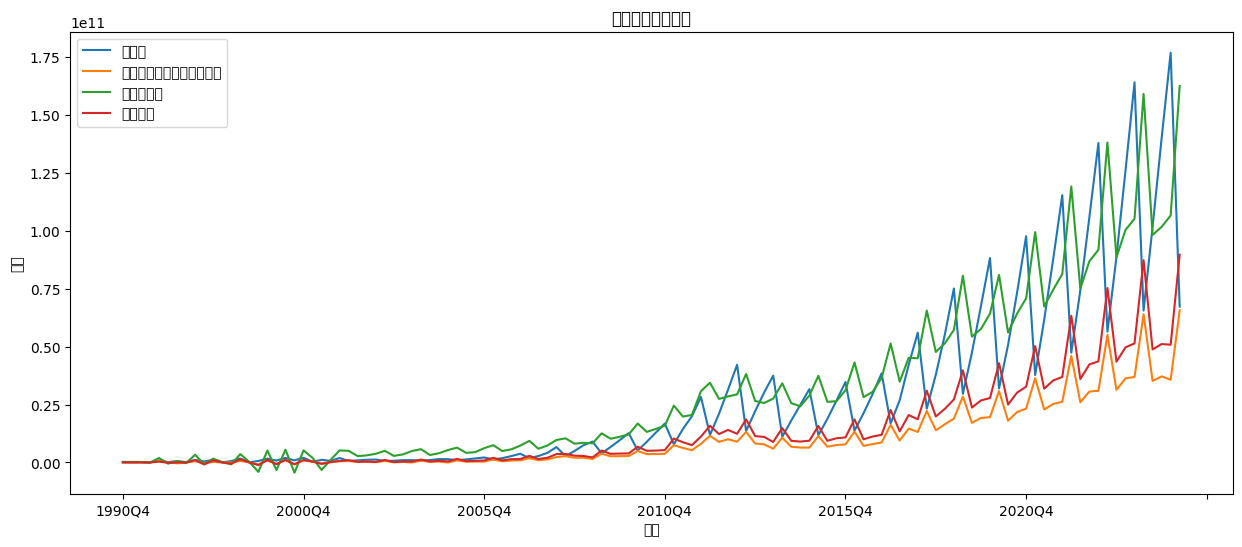

In [10]:

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set a font that supports Chinese characters
plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei']  # Use DejaVuSans
plt.rcParams['axes.unicode_minus'] = False  # Ensure minus signs are displayed correctly

symbols = get_symbols_by_sector(market="cn", sector="白酒.csv", dir_option="xq")
fd = FinanceData(market='cn')
data = fd.equity_finance_process(symbols=symbols)

data.plot(figsize=(15, 6))
plt.title("白酒行业财务数据")  # Chinese title
plt.xlabel("日期")  # Chinese label for x-axis
plt.ylabel("数值")  # Chinese label for y-axis
plt.legend(loc='best')
plt.show()